<img src="images/logo.png" width=320 style="float:left" />

In [1]:
from pixel_elements import *

In [2]:
# Helpers

def vert_join(elements):
    """Joins elements vertically in reversed order."""
    return np.concatenate(list(reversed(elements)), axis = 0)

def horz_join(elements):
    """Joins elements horizontally in the same order."""
    return np.concatenate(elements, axis = 1)

def paint(element, x, y):
    """Paints an element in the x, y position of the grid."""
    y = int(board.shape[0] / 5) - y
    board[(y * 5) - 5: y * 5, x * 5: (x * 5) + 5, :] = element

In [3]:
# Tools

def make_board(h, w):
    """Makes an MxN drawing board."""
    blank = make_canvas()
    board = horz_join([vert_join([blank] * h)] * w)
    return board

def paint_vert(x, y, monomer, link = 'a', occu = None):
    """Paints a monomer with a vertical stem at x, y."""
    paint(vert_stick(link, occu), x, y)
    paint(monomer, x, y + 1)
        
def paint_fuc(x, y, link = 'a', occu = None):
    """Paints Fucose with a horizontal stem from x, y."""
    paint(horz_stick(link, occu), x + 1, y + 1)
    paint(Fuc, x + 2, y + 1)
    
def paint_left_diag(x, y, monomer, link = 'a', occu = None):
    """Paints a monomer with a left diagonal stem from x, y."""
    paint(left_diag_stick(link, occu), x - 1, y)
    paint(monomer, x - 2, y + 1)
    
def paint_right_diag(x, y, unit, link = 'a', occu = None):
    """Paints a monomer with a right diagonal stem from x, y."""
    paint(right_diag_stick(link, occu), x + 1, y)
    paint(unit, x + 2, y + 1)

In [4]:
# Visuals

def show(board, axis = True, save = False):
    """Shows the drawing board."""
    h, w, _ = board.shape
    plt.imshow(board)
    plt.grid()
    if axis:
        plt.xticks(np.arange(0, w, 5) + 2, range(int(w / 5)))
        plt.yticks(np.arange(0, h, 5) + 2, reversed(range(int(h / 5))))
    else:
        plt.axis('off')
    plt.savefig('pixel_glycan.png', bbox_inches = 'tight') if save else plt.show()

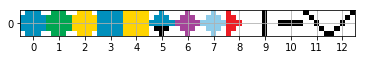

In [5]:
# Elements

elements = horz_join([Glc, Man, Gal, GlcNAc, GalNAc, GlcA, Neu5Ac, Neu5Gc, Fuc,
                      vert_stick(), horz_stick(), left_diag_stick(), right_diag_stick()])
show(elements)

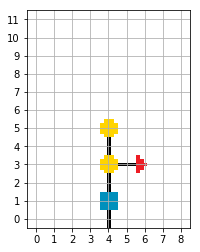

In [6]:
board = make_board(12, 9) # makes a drawing board of h = 12 and w = 9

c = 4 # sets x = 4 as the centre
paint_vert(c, 0, GlcNAc) # draws GlcNAc with stem from y = 0
paint_vert(c, 2, Gal)
paint_fuc(c, 2) # attaches Fuc next to unit with stem from y = 2
paint_vert(c, 4, Gal)
        
show(board) # shows the drawing board

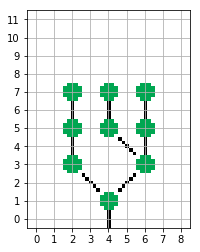

In [7]:
board = make_board(12, 9)

c = 4
paint_vert(c, 0, Man)
paint_left_diag(c, 2, Man) # draws Man diagonally to the left from y = 2
paint_right_diag(c, 2, Man)
paint_vert(c - 2, 4, Man)
paint_left_diag(c + 2, 4, Man)
paint_vert(c + 2, 4, Man)
paint_vert(c - 2, 6, Man)
paint_vert(c, 6, Man)
paint_vert(c + 2, 6, Man)

show(board, save = True) # drawings can be saved

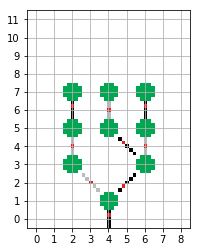

In [8]:
board = make_board(12, 9)

c = 4
paint_vert(c, 0, Man, 'a', '3') # linkage information like (a1-3) can be added
paint_left_diag(c, 2, Man, 'b', '4')
paint_right_diag(c, 2, Man, 'a', '3')
paint_vert(c - 2, 4, Man, 'b', '4')
paint_left_diag(c + 2, 4, Man, 'a', '3')
paint_vert(c + 2, 4, Man, 'b', '4')
paint_vert(c - 2, 6, Man, 'a', '3')
paint_vert(c, 6, Man, 'b', '4')
paint_vert(c + 2, 6, Man, 'a', '3')

show(board) # black is alpha, grey is beta and the red dot depicts the occupancy

In [9]:
board.shape # each board is a numpy array of the shape

(60, 45, 3)

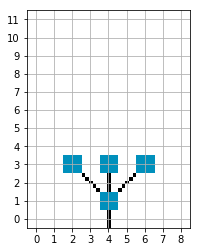

In [10]:
# more examples

board = make_board(12, 9)

c = 4
paint_vert(c, 0, GlcNAc)
paint_left_diag(c, 2, GlcNAc)
paint_vert(c, 2, GlcNAc)
paint_right_diag(c, 2, GlcNAc)

show(board)

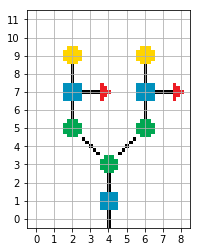

In [11]:
board = make_board(12, 9)

c = 4
paint_vert(c, 0, GlcNAc)
paint_vert(c, 2, Man)
paint_left_diag(c, 4, Man)
paint_right_diag(c, 4, Man)
paint_vert(c - 2, 6, GlcNAc)
paint_fuc(c - 2, 6)
paint_vert(c + 2, 6, GlcNAc)
paint_fuc(c + 2, 6)
paint_vert(c - 2, 8, Gal)
paint_vert(c + 2, 8, Gal)

show(board)

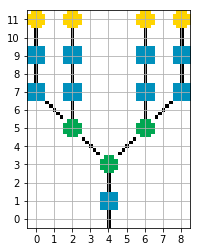

In [12]:
board = make_board(12, 9)

c = 4
paint_vert(c, 0, GlcNAc)
paint_vert(c, 2, Man)
paint_left_diag(c, 4, Man)
paint_right_diag(c, 4, Man)
paint_left_diag(c - 2, 6, GlcNAc)
paint_vert(c - 2, 6, GlcNAc)
paint_right_diag(c + 2, 6, GlcNAc)
paint_vert(c + 2, 6, GlcNAc)
paint_vert(c - 4, 8, GlcNAc)
paint_vert(c - 2, 8, GlcNAc)
paint_vert(c + 2, 8, GlcNAc)
paint_vert(c + 4, 8, GlcNAc)
paint_vert(c - 4, 10, Gal)
paint_vert(c - 2, 10, Gal)
paint_vert(c + 2, 10, Gal)
paint_vert(c + 4, 10, Gal)

show(board)